OFFICIAL_SYMBOL_A: Degree=1, Clustering Coefficient=0
OFFICIAL_SYMBOL_B: Degree=1, Clustering Coefficient=0
1810055G02Rik: Degree=3, Clustering Coefficient=0
MPRIP: Degree=15, Clustering Coefficient=0.13333333333333333
RAI14: Degree=15, Clustering Coefficient=0.12380952380952381
TPM1: Degree=15, Clustering Coefficient=0.10256410256410256
2810046L04Rik: Degree=2, Clustering Coefficient=0
ARF1: Degree=33, Clustering Coefficient=0.06451612903225806
ARF3: Degree=15, Clustering Coefficient=0.09523809523809523
4922501C03Rik: Degree=1, Clustering Coefficient=0
CPNE4: Degree=20, Clustering Coefficient=0
4930572J05Rik: Degree=6, Clustering Coefficient=0
C8orf55: Degree=2, Clustering Coefficient=0
PRKDC: Degree=119, Clustering Coefficient=0.0816386678455644
SPRR2B: Degree=3, Clustering Coefficient=0
SPRR2D: Degree=5, Clustering Coefficient=0
SPRR2E: Degree=4, Clustering Coefficient=0
SPRR2G: Degree=4, Clustering Coefficient=0
9830001H06Rik: Degree=9, Clustering Coefficient=0.1388888888888889
C1Q

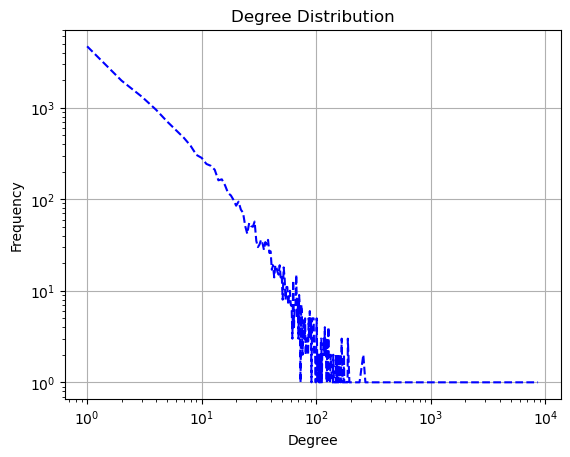

Scale-Free Test (Slope of Log-Log plot): -1.5612085626507404


In [2]:
# Q1.
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze the protein interaction network
def analyze_protein_interaction_network(pi_data_path):
    pi_data = pd.read_csv(pi_data_path, delim_whitespace=True, names=['Protein_A', 'Protein_B'])
    
    G = nx.from_pandas_edgelist(pi_data, 'Protein_A', 'Protein_B')
    
    # Calculate the degrees for each node
    degrees = dict(G.degree())
    
    # Calculate the clustering coefficient for each node
    clustering_coeffs = nx.clustering(G)
    
    # Calculate the average clustering coefficient for the network
    average_clustering_coeff = nx.average_clustering(G)
    
    for protein in G.nodes():
        print(f"{protein}: Degree={degrees[protein]}, Clustering Coefficient={clustering_coeffs[protein]}")
    
    print(f"Average Clustering Coefficient: {average_clustering_coeff}")
    
    # Plot the degree distribution
    degree_sequence = sorted(degrees.values(), reverse=True)
    degree_count = pd.Series(degree_sequence).value_counts().sort_index()
    plt.loglog(degree_count.index, degree_count.values, 'b--', markerfacecolor='r')
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    
    # Check if scale-free
    if np.all(np.diff(np.log(degree_count.index)) > 0):
        polyfit_log = np.polyfit(np.log(degree_count.index), np.log(degree_count.values), 1)
        print(f"Scale-Free Test (Slope of Log-Log plot): {polyfit_log[0]}")


# Define the path to the PPI data file
pi_data_path = 'Human-PPI.txt'
analyze_protein_interaction_network(pi_data_path)


In [6]:
#Q2.
import pandas as pd
import networkx as nx
from scipy.stats import mannwhitneyu

# Function to load protein list from a file
def load_protein_list(filepath):
    protein_list = pd.read_csv(filepath, header=None, names=['Protein'])
    return protein_list['Protein'].tolist()

# Function to calculate the shortest path lengths between proteins in a list
def calculate_path_lengths(G, protein_list):
    path_lengths = []
    for i, protein1 in enumerate(protein_list):
        for protein2 in protein_list[i + 1:]:
            if G.has_node(protein1) and G.has_node(protein2):
                try:
                    length = nx.shortest_path_length(G, source=protein1, target=protein2)
                    path_lengths.append(length)
                except nx.NetworkXNoPath:
                    pass 
    return path_lengths

# Function to perform the Mann-Whitney U test on two sets of path lengths
def perform_mann_whitney_u_test(set1, set2):
    statistic, p_value = mannwhitneyu(set1, set2, alternative='two-sided')
    return statistic, p_value

# Load the PI network
pi_data_path = 'Human-PPI.txt'
pi_data = pd.read_csv(pi_data_path, delim_whitespace=True, names=['Protein_A', 'Protein_B'])
G = nx.from_pandas_edgelist(pi_data, 'Protein_A', 'Protein_B')

# Load the protein lists
protein_list1_path = 'protein-list1.txt'
protein_list2_path = 'protein-list2.txt'
protein_list1 = load_protein_list(protein_list1_path)
protein_list2 = load_protein_list(protein_list2_path)

# Calculate path lengths
path_lengths_list1 = calculate_path_lengths(G, protein_list1)
path_lengths_list2 = calculate_path_lengths(G, protein_list2)

# Perform the Mann-Whitney U test
statistic, p_value = perform_mann_whitney_u_test(path_lengths_list1, path_lengths_list2)

# Output the results
print(f"Mann-Whitney U test statistic: {statistic}")
print(f"Mann-Whitney U test p-value: {p_value}")


Mann-Whitney U test statistic: 259326.0
Mann-Whitney U test p-value: 0.4879477857940109
